Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.preprocessing import OneHotEncoder

from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,f1_score,recall_score,precision_score,accuracy_score,precision_recall_curve,roc_curve,roc_auc_score

from xgboost import XGBClassifier

Input the dataset and view

In [2]:
tele_cust = pd.read_csv('telecom_customer_churn.csv')
tele_zip   = pd.read_csv('telecom_zipcode_population.csv')
tele_cust.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


Display the shape of the dataframe

In [3]:
tele_cust.shape

(7043, 38)

In [4]:
tele_cust.head(5)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


## Data Preprocessing

To check if the dataframe contains null values

In [5]:
tele_cust.isna().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

Filling of the null values for below fields with 0 

In [6]:
tele_cust['Avg Monthly Long Distance Charges'].fillna(0, inplace=True)
tele_cust['Avg Monthly GB Download'].fillna(0, inplace=True)

Filling Null values with most occured values

In [7]:
tele_custom = tele_cust.apply(lambda x: x.fillna(x.value_counts().index[0]))
tele_custom

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,Competitor,Competitor had better devices
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,Competitor,Competitor had better devices
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,...,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,Competitor,Competitor had better devices
7039,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,...,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,...,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined,Competitor,Competitor had better devices
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,...,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,Competitor,Competitor had better devices


Verifying null values in all columns

In [8]:
tele_custom.isna().sum()

Customer ID                          0
Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
City                                 0
Zip Code                             0
Latitude                             0
Longitude                            0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data           

In [9]:
#Dropping unrequired columns
tele_customer = tele_cust.drop(['Customer ID','Zip Code','City','Latitude','Longitude','Churn Category', 'Churn Reason'], axis = 1)

In [10]:
tele_customer.columns

Index(['Gender', 'Age', 'Married', 'Number of Dependents',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status'],
      dtype='object')

In [11]:
tele_customer.dtypes

Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming Movies                      object
Streaming Music                       object
Unlimited Data                        object
Contract                              object
Paperless 

Exploratory Data Analysis

In [12]:
tele_customer["Customer Status"].unique()

array(['Stayed', 'Churned', 'Joined'], dtype=object)

In [13]:
tele_customer["Customer Status"].value_counts()

Stayed     4720
Churned    1869
Joined      454
Name: Customer Status, dtype: int64

In [17]:
def percent(val):
    return f'{val / 100 * len(tele_customer):.0f}\n{val:.0f}%'

<AxesSubplot:ylabel='None'>

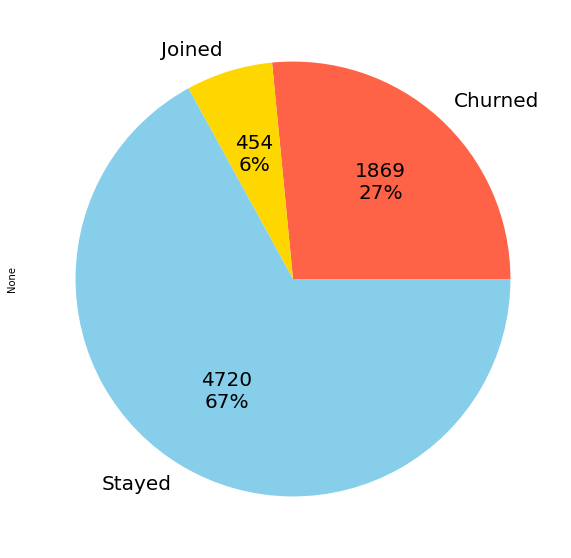

In [18]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(15, 10))
tele_customer.groupby('Customer Status').size().plot(kind='pie', autopct=percent, textprops={'fontsize': 20},
                                  colors=['tomato', 'gold', 'skyblue'], ax=ax1)

In [19]:
tele_customer["Offer"].unique()

array(['None', 'Offer E', 'Offer D', 'Offer A', 'Offer B', 'Offer C'],
      dtype=object)

In [20]:
tele_customer["Internet Type"].unique()

array(['Cable', 'Fiber Optic', 'DSL', nan], dtype=object)

In [21]:
df = tele_customer

In [4]:
df_clean = {"Customer Status": {"Churned": 1, "Stayed": 0, "Joined": 0}}
df_new = df.replace(df_clean)

NameError: name 'df' is not defined

In [3]:
corr = df_new.corr()
corr.style.background_gradient(cmap='coolwarm')

NameError: name 'df' is not defined

In [25]:
df.groupby(['Customer Status'])['Total Revenue'].sum()

Customer Status
Churned     3684459.82
Joined        54279.75
Stayed     17632392.12
Name: Total Revenue, dtype: float64

In [26]:
df.groupby(['Customer Status'])['Total Charges'].sum()

Customer Status
Churned     2862926.90
Joined        35998.90
Stayed     13161799.44
Name: Total Charges, dtype: float64

In [27]:
df.groupby(['Customer Status'])['Avg Monthly GB Download'].sum()

Customer Status
Churned    41446.0
Joined      6935.0
Stayed     96109.0
Name: Avg Monthly GB Download, dtype: float64

In [1]:
dfc = df[['Gender', 'Married','Multiple Lines','Internet Service','Internet Type','Online Security',
       'Online Backup','Device Protection Plan','Premium Tech Support','Streaming TV','Streaming Movies','Streaming Music',                    
       'Unlimited Data','Contract','Paperless Billing','Payment Method']]

for i, predictor in enumerate(dfc):
    plt.figure(i)
   # sns.countplot(data=df.loc[df['Customer Status'] == 'Churned'], x=predictor, hue= 'Customer Status')
    ax = sns.countplot(data=df, x=predictor, hue= 'Customer Status',palette = ['#008B8B', '#00CDCD', '#00EEEE'])
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(predictor), loc='center')
    plt.xticks(rotation = 20, fontsize = 10)

NameError: name 'df' is not defined

In [299]:
sns.catplot(x="Customer Status", y="Total Revenue", kind="swarm", data=df,palette = ['#0000EE', '#FF4040', '#FFB90F'])

SyntaxError: unmatched ')' (Temp/ipykernel_25028/944174026.py, line 1)

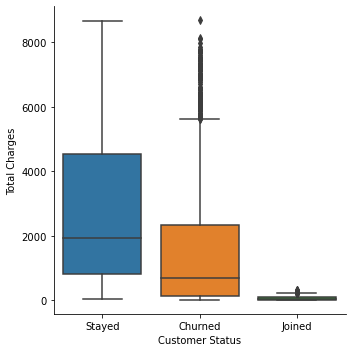

In [29]:
sns.catplot(x="Customer Status", y="Total Charges", kind="box", data=df)

C:\Users\PRERNA\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 89.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\PRERNA\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 76.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\PRERNA\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 39.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


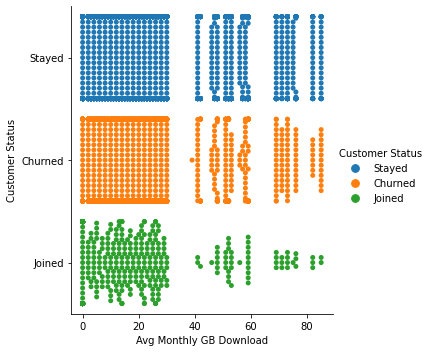

In [30]:
sns.catplot(x="Avg Monthly GB Download", y="Customer Status", hue="Customer Status", kind="swarm", data=df)

<AxesSubplot:xlabel='Contract', ylabel='Count'>

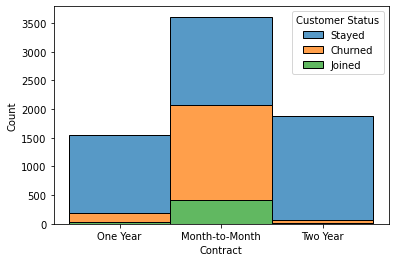

In [35]:
sns.histplot(binwidth=0.5, x="Contract", hue="Customer Status", data=df, stat="count", multiple="stack")

Data Modelling

In [36]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['Gender','Married','Phone Service','Multiple Lines','Internet Service','Internet Type','Online Security',
       'Online Backup','Offer','Device Protection Plan','Premium Tech Support','Streaming TV','Streaming Movies','Streaming Music',                    
       'Unlimited Data','Contract','Paperless Billing','Payment Method'])
data = one_hot_encoded_data.drop(['Gender_Female','Married_No','Multiple Lines_No','Internet Service_No',
                               'Online Security_No','Online Backup_No','Device Protection Plan_No','Premium Tech Support_No',
                               'Streaming TV_No','Streaming Movies_No','Streaming Music_No','Unlimited Data_No'], axis = 1)
data["Customer Status"] = data["Customer Status"].astype('category').cat.codes

In [37]:
one_hot_encoded_data1 = pd.get_dummies(df_new, columns = ['Gender','Married','Phone Service','Multiple Lines','Internet Service','Internet Type','Online Security',
       'Online Backup','Offer','Device Protection Plan','Premium Tech Support','Streaming TV','Streaming Movies','Streaming Music',                    
       'Unlimited Data','Contract','Paperless Billing','Payment Method'])
data1 = one_hot_encoded_data1.drop(['Gender_Female','Married_No','Multiple Lines_No','Internet Service_No',
                               'Online Security_No','Online Backup_No','Device Protection Plan_No','Premium Tech Support_No',
                               'Streaming TV_No','Streaming Movies_No','Streaming Music_No','Unlimited Data_No'], axis = 1)

In [38]:
target='Customer Status'
x=data.drop(target,axis=1)
x1=data1.drop(target,axis=1)
y=data['Customer Status']
y1= data1['Customer Status']
x_train,x_test,y_train,y_test=train_test_split(x,y,
                                        test_size=0.33)
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,
                                        test_size=0.33)

In [39]:
print(len(x_train))
print(len(x_test))

4718
2325


In [53]:
def evaluate_model(actual, pred):
    # Accuracy Score
    acc_score = accuracy_score(actual, pred)*100
    print('Accuracy Score : ',acc_score)
    #ROC_AUC score
    #roc_score = round(roc_auc_score(actual, pred)*100,2)
    #print('ROC AUC score : ',roc_score)
    # Precision score
    prec_score = round(precision_score(actual, pred,average='micro')*100,2)
    print('Precision score : ', prec_score)
    # Recall score
    rec_score = round(recall_score(actual, pred,average='micro')*100,2)
    print('Recall score : ', rec_score)

    return acc_score, prec_score, rec_score

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression(class_weight='balanced', random_state=1)
model.fit(x1_train, y1_train)
y1_pred = model.predict(x1_test)
acc_score, prec_score, rec_score = evaluate_model(y1_test, y1_pred)
#score= accuracy_score(y1_test,y1_pred)
#print(score)
#model_score_list.append({'model_name':'LogisticRegression', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score': rec_score})

Accuracy Score :  72.94623655913979
Precision score :  72.95
Recall score :  72.95


C:\Users\PRERNA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


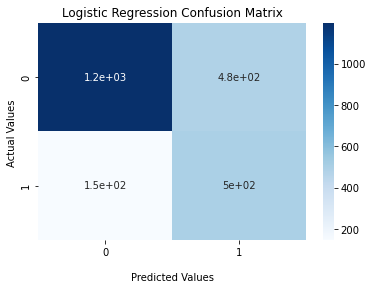

[[1198  482]
 [ 147  498]]


In [55]:
#Confusion matrix for Logistic Regression
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y1_test, y1_pred) # Calulate Confusion matrix for test set.
ax = sns.heatmap(cm,annot=True,cmap='Blues')
ax.set_title('Logistic Regression Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()
print(cm)

In [56]:

from sklearn.metrics import accuracy_score

forest = RandomForestClassifier(n_estimators=200,
                                 random_state=1)
forest.fit(x_train, y_train)
y_pred=forest.predict(x_test)
#accuracy_score = metrics.accuracy_score(y_test, y_pred)
#print(accuracy_score)
acc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)
#score = accuracy_score(y_test, y_pred)
#print(score)

Accuracy Score :  83.95698924731182
Precision score :  83.96
Recall score :  83.96


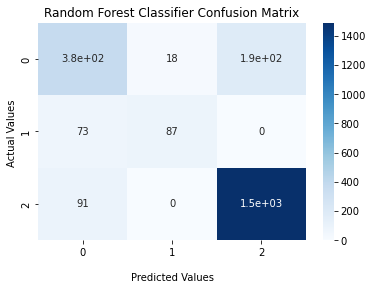

[[ 376   18  191]
 [  73   87    0]
 [  91    0 1489]]


In [57]:
#Confusion matrix for Random Forest Classifier

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) # Calulate Confusion matrix for test set.
ax = sns.heatmap(cm,annot=True,cmap='Blues')
ax.set_title('Random Forest Classifier Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()
print(cm)

<AxesSubplot:title={'center':'Visualizing Important Features'}, xlabel='Feature Importance Score', ylabel='Features'>

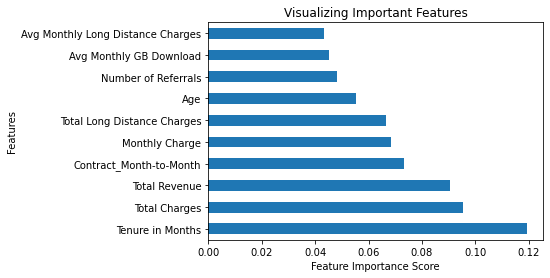

In [58]:
feature_imp = pd.Series(forest.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_imp
#sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend()
#plt.show()
feature_imp.nlargest(10).plot(kind='barh')

In [60]:
adb = AdaBoostClassifier()
adb_model = adb.fit(x_train,y_train)
y_pred = adb.predict(x_test)
#accuracy_score = adb_model.score(x_test,y_test)
#print(accuracy_score)
acc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

Accuracy Score :  76.12903225806451
Precision score :  76.13
Recall score :  76.13


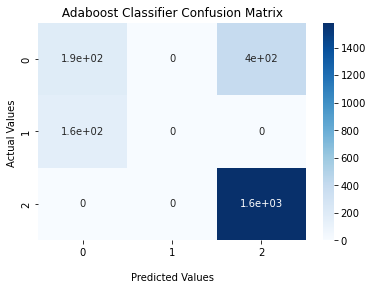

[[ 190    0  395]
 [ 160    0    0]
 [   0    0 1580]]


In [61]:
#Confusion matrix for Adaboost Classifier
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) # Calulate Confusion matrix for test set.
ax = sns.heatmap(cm,annot=True,cmap='Blues')
ax.set_title(' Adaboost Classifier Confusion Matrix ');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()
print(cm)

In [62]:
#XGBoost
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
#accuracy = accuracy_score(y_test, y_pred)
#print(accuracy)
acc_score, prec_score, rec_score = evaluate_model(y_test, y_pred)

Accuracy Score :  84.47311827956989
Precision score :  84.47
Recall score :  84.47


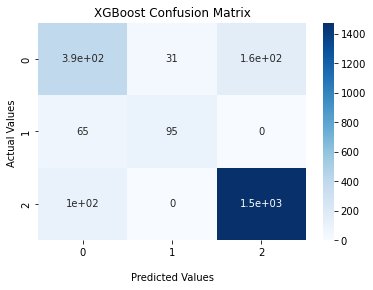

[[ 394   31  160]
 [  65   95    0]
 [ 105    0 1475]]


In [63]:
#Confusion matrix for XGBoost Classifier
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) # Calulate Confusion matrix for test set.
ax = sns.heatmap(cm,annot=True,cmap='Blues')
ax.set_title('XGBoost Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()
print(cm)